# In the first import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import dask.dataframe as dd
import plotly.express as px
import time
import warnings
warnings.filterwarnings('ignore')

/home/youssef/.local/lib/python3.10/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# Then Explore Dataset

In [2]:
#Load dataset into Dataframe to manage it and explore it
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', low_memory=False)

print(df.head())
print(df.info())
print(df.columns)




        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY 

In [3]:
#cleaning and focus on important columns to work in it 
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

df=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

print(df.head())


   Year  Month  Day             Country    state                       Region  \
0  1970      7    2  Dominican Republic      NaN  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   
2  1970      1    0         Philippines   Tarlac               Southeast Asia   
3  1970      1    0              Greece   Attica               Western Europe   
4  1970      1    0               Japan  Fukouka                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target Summary  \
0     1

In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181256 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181053 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [5]:
print(df.columns)
df.isnull().sum()

Index(['Year', 'Month', 'Day', 'Country', 'state', 'Region', 'city',
       'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target',
       'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'],
      dtype='object')


Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              435
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            638
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [6]:
#comparison between pandas and dask performance
ddf = dd.from_pandas(df, npartitions=24)
print(ddf.info())

<class 'dask.dataframe.core.DataFrame'>
Columns: 18 entries, Year to Motive
dtypes: object(11), float64(4), int64(3)None


In [7]:

#after searching to find this important data and present it
print("Country with the most attacks:",df['Country'].value_counts().idxmax())
print("City with the most attacks:",df['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Month with the most attacks:",df['Month'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().index[1]) #as first entry is 'unknown'
print("Most Attack Types:",df['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


# Data Analysis Part

In [8]:
mean_values = np.mean(df.select_dtypes(include=[np.number]), axis=0)
median_values = np.median(df.select_dtypes(include=[np.number]), axis=0)
std_values = np.std(df.select_dtypes(include=[np.number]), axis=0)
print("\n\nMean:\n\n", mean_values)
print("\n\nMedian:\n\n", median_values)
print("\n\nStd Dev:\n\n", std_values)



Mean:

 Year         2002.638997
Month           6.467277
Day            15.505644
latitude       23.498343
longitude    -458.695653
Killed          2.403272
Wounded         3.167668
dtype: float64


Median:

 [2009.    6.   15.   nan   nan   nan   nan]


Std Dev:

 Year             13.259394
Month             3.388294
Day               8.814020
latitude         18.569190
longitude    204778.410576
Killed           11.545707
Wounded          35.949283
dtype: float64


In [9]:
frequent_values = df.select_dtypes(include=[object]).apply(lambda x: x.value_counts().idxmax())
print("\n\n\n",frequent_values,"\n")




 Country                                                     Iraq
state                                                    Baghdad
Region                                Middle East & North Africa
city                                                     Unknown
AttackType                                     Bombing/Explosion
Target                                                 Civilians
Summary        09/00/2016: Sometime between September 18, 201...
Group                                                    Unknown
Target_type                          Private Citizens & Property
Weapon_type                                           Explosives
Motive                                                   Unknown
dtype: object 



# Use Pandas with dask to get maximum performance for data analysis (comparison)

In [10]:
# yearly_attacks = ddf.groupby('iyear').size().compute()
# region_attacks = ddf.groupby('region_txt').size().compute()
# country_attacks = ddf.groupby('country_txt').size().compute()
# attack_types = ddf['attacktype1_txt'].value_counts().compute()
# target_types = ddf['targtype1_txt'].value_counts().compute()
#with dask
#12.8s

yearly_attacks = df.groupby('Year').size()
region_attacks = df.groupby('Region').size()
country_attacks = df.groupby('Country').size()
attack_types = df['AttackType'].value_counts()
target_types = df['Target_type'].value_counts()

print("Yearly Attacks:\n", yearly_attacks.head(10))
#with pandas only
#25s


Yearly Attacks:
 Year
1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
1978    1526
1979    2662
dtype: int64


In [11]:
print("\nRegion Attacks:\n", region_attacks)



Region Attacks:
 Region
Australasia & Oceania            282
Central America & Caribbean    10344
Central Asia                     563
East Asia                        802
Eastern Europe                  5144
Middle East & North Africa     50474
North America                   3456
South America                  18978
South Asia                     44974
Southeast Asia                 12485
Sub-Saharan Africa             17550
Western Europe                 16639
dtype: int64


In [12]:
print("\nCountry Attacks:\n", country_attacks.head(12))



Country Attacks:
 Country
Afghanistan            12731
Albania                   80
Algeria                 2743
Andorra                    1
Angola                   499
Antigua and Barbuda        1
Argentina                815
Armenia                   24
Australia                114
Austria                  115
Azerbaijan                49
Bahamas                    5
dtype: int64


In [13]:
print("\nAttack Types:\n", attack_types)



Attack Types:
 AttackType
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: count, dtype: int64


In [14]:
print("\nTarget Types:\n", target_types)


Target Types:
 Target_type
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: count, dtype: int64


# Data Visualisation

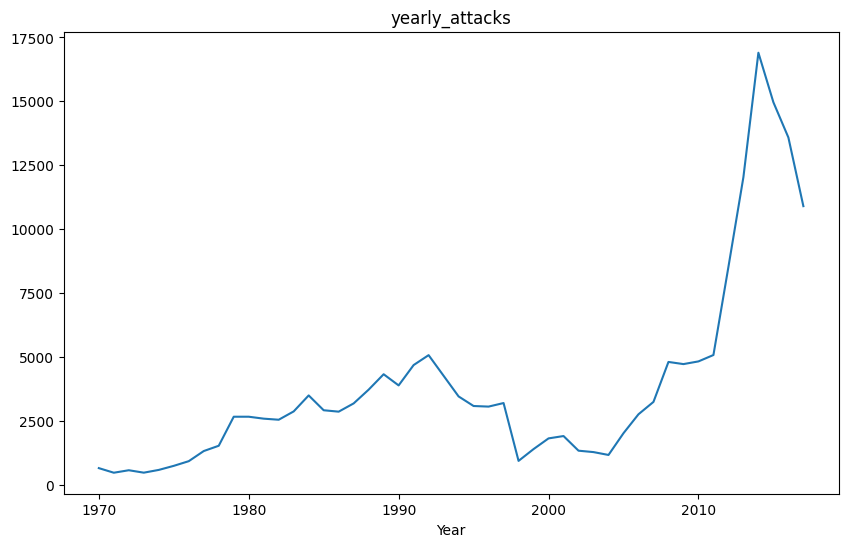

In [15]:
#1
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_attacks)
plt.title('yearly_attacks')
plt.show()

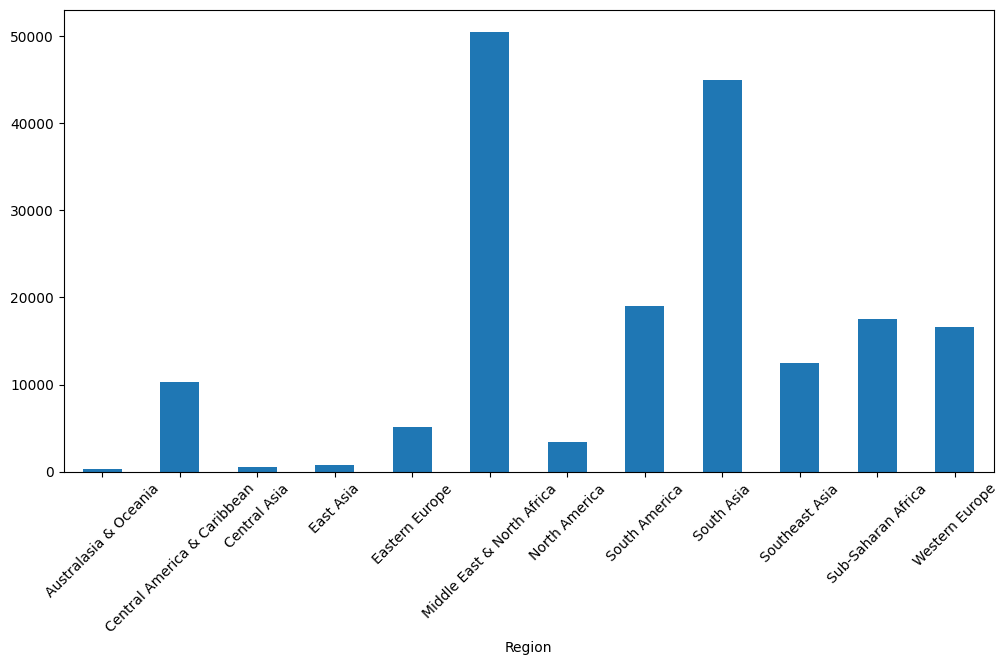

In [16]:
#2
plt.figure(figsize=(12, 6))
region_attacks.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

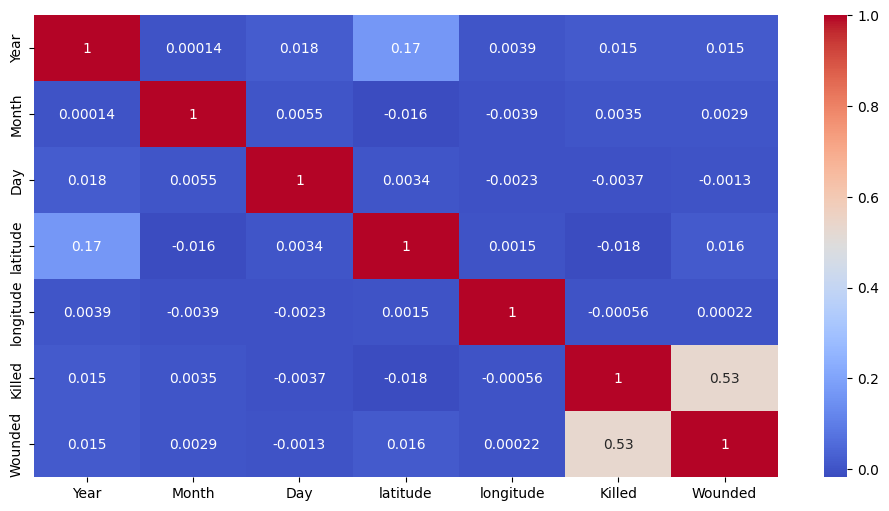

In [17]:
#3
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

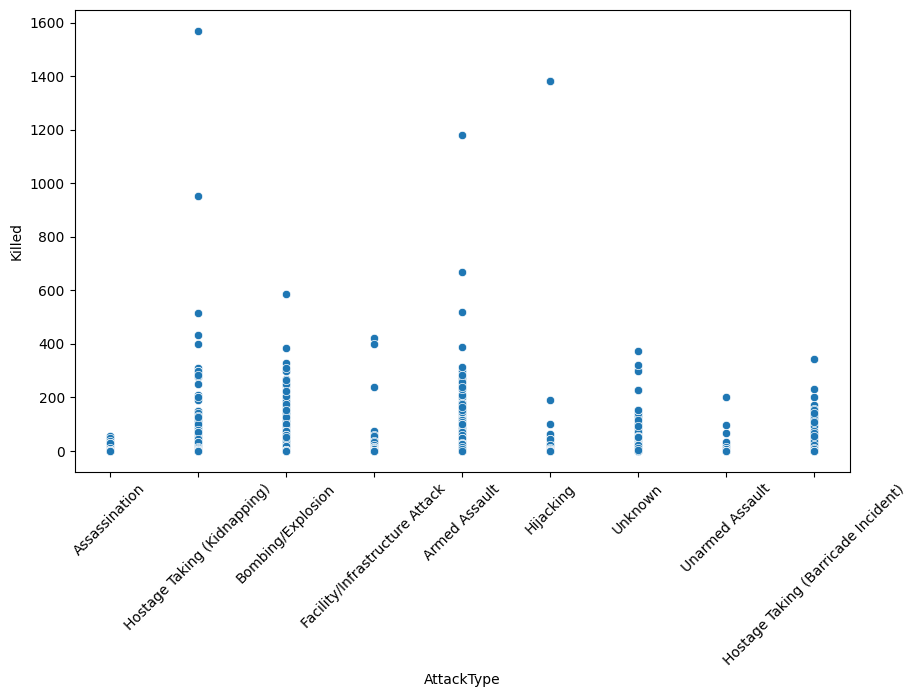

In [18]:
#4
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AttackType', y='Killed', data=df)
plt.xticks(rotation=45)
plt.show()

# Save data after cleaning and transformation

In [26]:
threshold = len(df) * 0.5
df = df.dropna(axis=1, thresh=threshold)


In [27]:
categorical_columns = ['Country', 'state', 'Region', 'city', 'AttackType', 'Target_type', 'Weapon_type', 'Group']
for column in categorical_columns:
    if column in df.columns:
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)

In [28]:
critical_columns = ['latitude', 'longitude', 'Killed', 'Wounded']
df = df.dropna(subset=critical_columns)

In [31]:
df.isnull().sum()
df.to_csv('globalterrorism_cleaned_data.csv', index=False)
